In [21]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [22]:
dataset=pd.read_csv(r"C:\FINAL YEAR PROJECT\dataset\NEW.csv")

In [23]:
dataset=dataset.iloc[:,1:]

In [24]:
X=dataset[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [25]:
y=dataset[['HeartDisease']]

# Feature Selection

In [26]:
from sklearn.feature_selection import RFE


In [27]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [28]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Sex selected=False rank=4
ChestPainType selected=True rank=1
RestingBP selected=False rank=2
Cholesterol selected=False rank=3
FastingBS selected=False rank=5
RestingECG selected=False rank=6
MaxHR selected=True rank=1
ExerciseAngina selected=False rank=7
Oldpeak selected=True rank=1
ST_Slope selected=True rank=1


# cross validation k fold

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print(f"Error Mean: {nm.mean(scores)} Error Std: {nm.std(scores)}")

Error Mean: 0.5350844827855856 Error Std: 0.059056005724798084


# Heatmap


In [30]:
data_corr=dataset.corr()

Text(0.5, 1.0, 'Heatmap ')

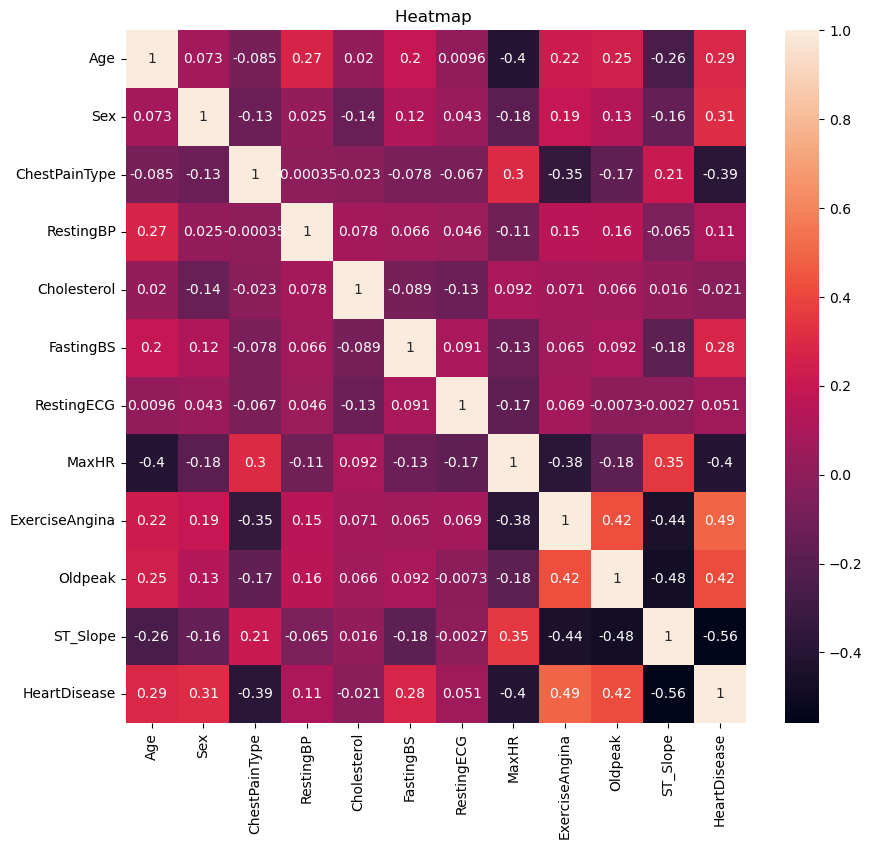

In [31]:
plt.figure(figsize=(10,9))
sns.heatmap(data_corr,cbar=True,annot=True)
plt.title("Heatmap ")